<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Polui%C3%A7%C3%A3o_Regress%C3%A3o_Cria%C3%A7%C3%A3oDeFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p

# Compartilhamento é Lindo!

![](https://cienciadosdados.com/images/2021/PROVA/sentinel.png)

O instrumento de missão Sentinel-5 Precursor coleta dados úteis para avaliar a qualidade do ar. O instrumento TROPOMI é um sensor multiespectral que registra a refletância de comprimentos de onda importantes para medir as concentrações atmosféricas de ozônio, metano, formaldeído, aerossol, monóxido de carbono, óxido de nitrogênio e dióxido de enxofre, bem como características de nuvem em uma resolução espacial de 0,01 graus de arco.

![](https://cienciadosdados.com/images/2021/PROVA/sentinel2.png)

![](https://cienciadosdados.com/images/2021/PROVA/sentinel3.png)

## Tamanho do PM2.5
![](https://i.pinimg.com/originals/68/8e/35/688e35cb3851f7af287527bca8c845cf.gif)



![](https://thumbs.gfycat.com/CluelessSkinnyCoati-size_restricted.gif)

![](https://i.pinimg.com/originals/30/a9/94/30a9942b25358b19e1b8db2b473689b4.gif)

![](https://news.blr.com/app/uploads/sites/2/2019/04/ParticulateMatter_Health.jpg) ![](https://www.who.int/airpollution/household/pollutants/particulate-matter-healthimpacts.png) 


## **Formas de Prever a Poluição**

O objetivo deste desafio para o Cientista de Dados é **prever a concentração de partículas de PM2,5 no ar todos os dias para cada cidade**.

PM2.5 refere-se a partículas atmosféricas com diâmetro inferior a 2,5 micrômetros e é um dos poluentes atmosféricos mais nocivos. 

PM2.5 é uma medida comum de qualidade do ar que normalmente requer sensores baseados no solo para medir. 

Os dados cobrem os últimos três meses, abrangendo centenas de cidades em todo o mundo.



![](https://2.bp.blogspot.com/-vG3806JOB18/XFKpVietyZI/AAAAAAAADds/5PsmY_66BjIUYm-4mrEifSdXJhfEChfsgCLcBGAs/s1600/2357f3ba-3350-4bfc-bde5-809ad1d8416d.gif)


Os dados vêm de três fontes principais:

1. **Sensores de qualidade do ar baseados no solo**. Estes medem a variável alvo (concentração de partículas PM2,5). Além da coluna alvo (que é a concentração média diária) , também existem colunas para leituras mínimas e máximas naquele dia, a variação das leituras e o número total (contagem) de leituras do sensor usadas para calcular o valor alvo. 

2. **O Global Forecast System (GFS)** para dados meteorológicos. Umidade, temperatura e velocidade do vento, que podem ser usados ​​como dados de entrada para o seu modelo. https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25

3. **O satélite Sentinel 5P**. Este satélite monitora vários poluentes na atmosfera. Para cada poluente, consultamos os conjuntos de dados offline de Nível 3 (L3) disponíveis no Google Earth Engine (você pode ler mais sobre os produtos individuais aqui: https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p). 


Para um determinado poluente, por exemplo NO2, fornecemos todos os dados do conjunto de dados do Sentinel 5P para esse poluente. Isso inclui as principais medições, como NO2_column_number_density (uma medida de concentração de NO2), bem como metadados, como a altitude do satélite. Recomendamos que você se concentre nas medições principais, seja column_number_density ou tropospheric_X_column_number_density (que mede a densidade mais perto da superfície da Terra).

# Previsão de Queimadas..


# 1° Problema de Negócio

Não há como negar que a poluição do ar está impactando a natureza e o clima. Um valor de Índice de Qualidade do Ar ( AQI ) de 201 a 300 se traduz em condições de qualidade do ar muito insalubres para a sobrevivência, com altos níveis de preocupação com a saúde. Você, Cientista de Dados, foi convidado por entidades de proteção ambiental para ajudar no monitoramento do índice de poluição do ar em sua cidade para que eles possam tomar as medidas necessárias.

![](https://he-s3.s3.amazonaws.com/media/uploads/9b93cdd7-0930-4d09-bc8c-691a139b8d39.png)

Devido ao aumento do número de veículos em sua cidade, o nível de poluição do ar está aumentando e, consequentemente, afetando a natureza. 

Você precisa construir uma Máquina Preditiva para prever o índice de poluição do ar com base nos dados históricos fornecidos para ajudar o governo e a sociedade a administrar essa parada.

# 2° Análise Exploratória dos Dados

#Fonte de dados
https://bit.ly/2Xasezb

O conjunto de dados consiste em determinados parâmetros, como umidade, velocidade e direção do vento, temperatura, visibilidade e muito mais em uma data específica em um horário mencionado.

Os benefícios de praticar este problema usando técnicas de aprendizado de máquina são os seguintes:

Este desafio o incentivará a aplicar suas habilidades de aprendizado de máquina para construir modelos que possam prever o índice de poluição do ar com base em dados históricos do clima
Este desafio o ajudará a aprimorar seu conhecimento sobre regressão baseada em séries temporais. A regressão é um dos blocos de construção básicos do aprendizado de máquina
Desafiamos você a construir um modelo que preveja o índice de poluição do ar em um dia específico no futuro.

In [1]:
# Importação de Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Conexão com os DADOS
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  object 
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  air_pollution_index  33750 non-null  int64  
 13  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.6+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            14454 non-null  object 
 1   is_holiday           14454 non-null  object 
 2   humidity             14454 non-null  int64  
 3   wind_speed           14454 non-null  int64  
 4   wind_direction       14454 non-null  int64  
 5   visibility_in_miles  14454 non-null  int64  
 6   dew_point            14454 non-null  int64  
 7   temperature          14454 non-null  float64
 8   rain_p_h             14454 non-null  float64
 9   snow_p_h             14454 non-null  int64  
 10  clouds_all           14454 non-null  int64  
 11  weather_type         14454 non-null  object 
 12  traffic_volume       14454 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.4+ MB


In [5]:
train.head(3)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767


In [6]:
train.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,154.841422,3240.118163
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,83.735515,1991.487289
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,83.000000,1165.250000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,155.000000,3335.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,228.000000,4926.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000


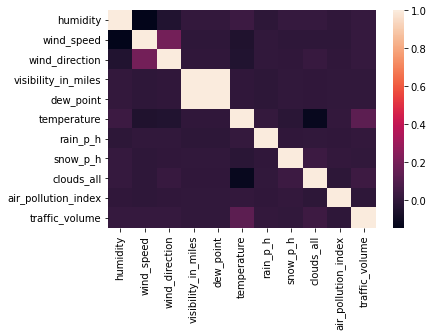

In [7]:
import seaborn as sns

sns.heatmap(train.corr())

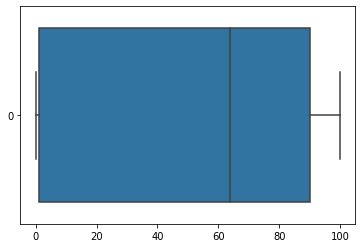

In [ ]:
# boxplot
sns.boxplot(data = train['clouds_all'], orient = "h");

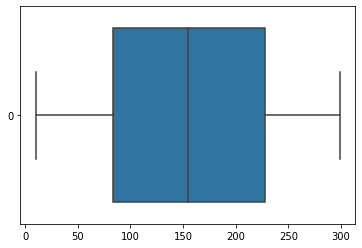

In [ ]:
# boxplot
sns.boxplot(data = train['air_pollution_index'], orient = "h");

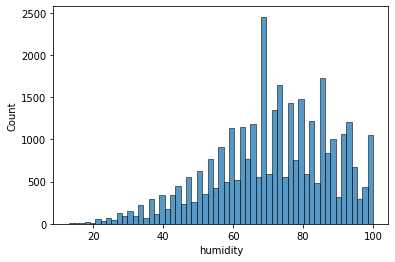

In [ ]:
train.describe()
sns.histplot(train.humidity)

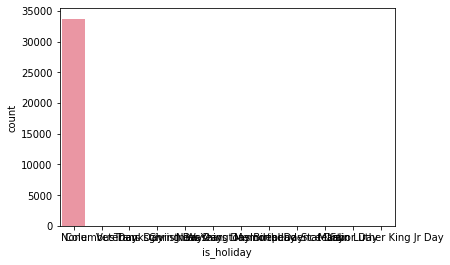

In [ ]:
train.describe()
sns.countplot(train.is_holiday)

In [ ]:
# Show breakdown of categorical feature sex
train.is_holiday.value_counts()

None                         33707
Christmas Day                    5
New Years Day                    5
Thanksgiving Day                 5
Veterans Day                     4
Labor Day                        4
Columbus Day                     4
Washingtons Birthday             4
Independence Day                 3
Martin Luther King Jr Day        3
Memorial Day                     3
State Fair                       3
Name: is_holiday, dtype: int64

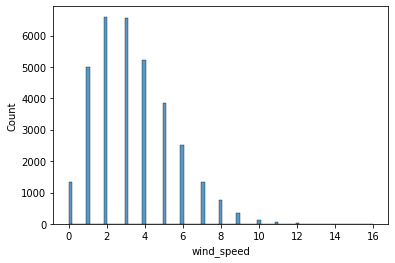

In [ ]:
train.describe()
sns.histplot(train.wind_speed )

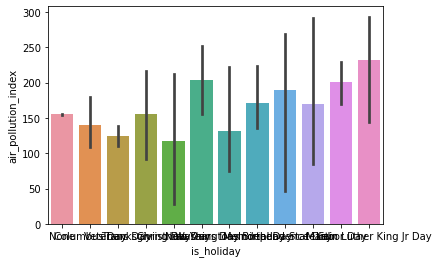

In [ ]:
# barplot
sns.barplot(x = "is_holiday", y = "air_pollution_index", data = train);

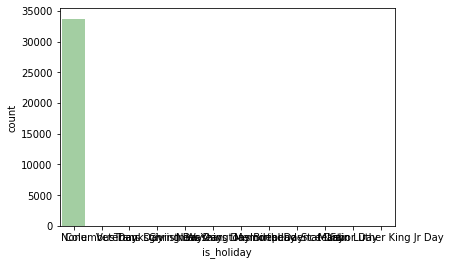

In [8]:
# countplot
sns.countplot(x = "is_holiday", data = train, palette = "Greens_d");

# 3° Pré-Processamento dos Dados

In [9]:
train['visibility_in_miles_&_dew_point']=train['visibility_in_miles']/train['dew_point']

In [10]:
train['visibility_in_miles_&_dew_point'].nunique()

1

In [11]:
test['visibility_in_miles_&_dew_point']=test['visibility_in_miles']//test['dew_point']

In [12]:
test['visibility_in_miles_&_dew_point'].nunique()

1

In [13]:
# Eliminando variáveis idênticas
del train['visibility_in_miles_&_dew_point']
del test['visibility_in_miles_&_dew_point']
del train['visibility_in_miles']
del test['visibility_in_miles']

In [14]:
train['hum_ratio_temp']=train['temperature']/train['humidity']
test['hum_ratio_temp']=test['temperature']/test['humidity']

In [ ]:
#train=train.drop(24872)

In [15]:
train.isnull().sum(),test.isnull().sum()

(date_time              0
 is_holiday             0
 humidity               0
 wind_speed             0
 wind_direction         0
 dew_point              0
 temperature            0
 rain_p_h               0
 snow_p_h               0
 clouds_all             0
 weather_type           0
 air_pollution_index    0
 traffic_volume         0
 hum_ratio_temp         0
 dtype: int64, date_time         0
 is_holiday        0
 humidity          0
 wind_speed        0
 wind_direction    0
 dew_point         0
 temperature       0
 rain_p_h          0
 snow_p_h          0
 clouds_all        0
 weather_type      0
 traffic_volume    0
 hum_ratio_temp    0
 dtype: int64)

### Converter a temperatura de Kelvin para Celsios

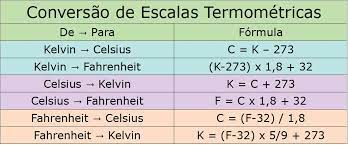

In [16]:
train['temperature']=train['temperature']-273.15
test['temperature']=test['temperature']-273.15

### Fazendo Label Encoder (convertento texto em número)

In [17]:

loc = np.append(train['is_holiday'].values, test['is_holiday'].values, axis=0)

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['is_holiday']=l.transform(train['is_holiday'])
test['is_holiday']=l.transform(test['is_holiday'])

In [18]:

loc = np.append(train['weather_type'].values, test['weather_type'].values, axis=0)

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['weather_type']=l.transform(train['weather_type'])
test['weather_type']=l.transform(test['weather_type'])

### Transformando variáveis de Data/hora,para criar mais variáveis de Tempo

In [19]:
# Base de Treino
train['date_time'] = pd.to_datetime(train['date_time'])
train['year'] = train['date_time'].dt.year
train['day'] = train['date_time'].dt.day
train['weekofyear'] = train['date_time'].dt.weekofyear
train['month'] = train['date_time'].dt.month
train['dayofweek'] = train['date_time'].dt.dayofweek
train['weekend'] = (train['date_time'].dt.weekday >=5).astype(int)
#df['days_since_release'] = (datetime.datetime(2021, 9, 11) - df['Timestamp']).dt.days
train['hour'] = train['date_time'].dt.hour
#train['minute'] = train['date_time'].dt.minute

<ipython-input-19-247324e67901>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['weekofyear'] = train['date_time'].dt.weekofyear


In [20]:
#Base de Test
test['date_time'] = pd.to_datetime(test['date_time'])
test['year'] = test['date_time'].dt.year
test['day'] = test['date_time'].dt.day
test['weekofyear'] = test['date_time'].dt.weekofyear
test['month'] = test['date_time'].dt.month
test['dayofweek'] = test['date_time'].dt.dayofweek
test['weekend'] = (test['date_time'].dt.weekday >=5).astype(int)
#df['days_since_release'] = (datetime.datetime(2019, 8, 1) - df['Timestamp']).dt.days
test['hour'] = test['date_time'].dt.hour
#test['minute'] = test['date_time'].dt.minute

<ipython-input-20-b02a5d790b5a>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['weekofyear'] = test['date_time'].dt.weekofyear


In [21]:
# Imprimindo para ver o campo transformado
out1=test['date_time']
out1

0       2017-05-18 00:00:00
1       2017-05-18 00:00:00
2       2017-05-18 00:00:00
3       2017-05-18 01:00:00
4       2017-05-18 01:00:00
                ...        
14449   2018-09-30 19:00:00
14450   2018-09-30 20:00:00
14451   2018-09-30 21:00:00
14452   2018-09-30 22:00:00
14453   2018-09-30 23:00:00
Name: date_time, Length: 14454, dtype: datetime64[ns]

In [22]:
# Ignorando Alertas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
# Deletando variável que não vamos usar
del train['date_time']
del test['date_time']

### Amostragem dos Dados

In [24]:
# Separando variáveis explicativas e o Target
X = train.drop(labels=['air_pollution_index'], axis=1)
y = train['air_pollution_index'].values

# Separando os dados para Treinar e testar
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
# Dando uma olhada na shape das bases
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((25312, 19), (25312,), (8438, 19), (8438,))

# 4° Construção da Máquina Preditiva

In [26]:
# Criando uma Máquina Preditiva Regressora, pois iremos prever um valor que é um índice de poluição
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=100, learning_rate=0.1, n_estimators=100, random_state=101)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)


      Iter       Train Loss   Remaining Time 
         1        6983.0829            5.91s
         2        6980.4103            5.79s
         3        6977.9502            5.73s
         4        6976.2866            5.85s
         5        6974.8857            5.77s
         6        6972.1712            5.84s
         7        6969.6306            5.73s
         8        6967.3294            6.00s
         9        6965.8516            5.92s
        10        6963.6689            5.81s
        11        6961.5845            5.70s
        12        6959.4784            5.64s
        13        6957.3059            5.54s
        14        6955.2651            5.44s
        15        6952.3196            5.37s
        16        6950.6823            5.34s
        17        6948.6175            5.26s
        18        6946.3937            5.17s
        19        6944.5229            5.11s
        20        6941.7092            5.03s
        21        6940.6021            4.97s
        2

# 5° Avaliação da Máquina Preditiva

In [27]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error

In [28]:
print('score', 100-sqrt(mean_absolute_error(y_cv, y_pred)))

score 91.43895711028998


#### Variáveis mais Importantes da Máquina Preditiva

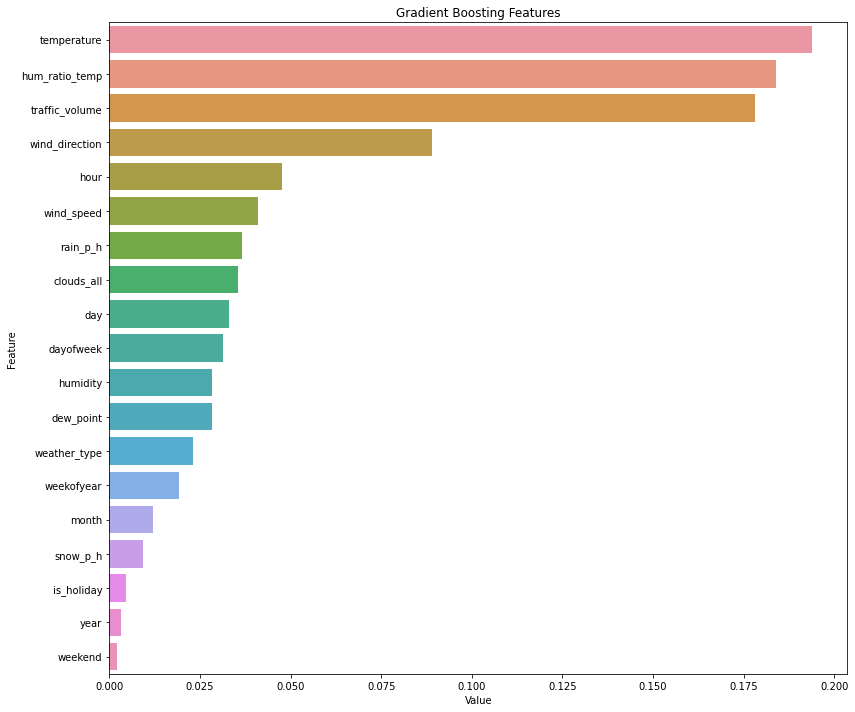

In [29]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()